# Analysis Statistics Coronavirus in Iran
##### Review statistics collectively

________________________________________________________________________________________



Coronavirus, started from Wuhan, China in December 2019,
It was spreading throughout the world and become the biggest global pandemic since the Spanish flu in 1918,
which caused millions of deaths.

This notebook will visualize the situation and trend of coronavirus outbreak at a country level.



##### Source of this information:

    Official statistics of corona in Iran (patients, deaths, recovered) from March 27, 2017 to April 20, 2016 .
    ("https://iranopendata.org/en/dataset/official-corona-statistics-in-iran-patients-deaths-recovered")
    
##### Note: 
    - This research is based on the Jalali calendar.
    - This is the first exercise to using Python in data analysis.


    
    
    

________________________________________________________________________________________


In [25]:
#--Loading libraries

import pandas as pd 
import matplotlib.pyplot as plt

In [26]:
#--Loading Data And check the general information of the file and especially the type of columns

df = pd.read_csv("Population_statistics.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            415 non-null    object
 1   Total_Patients  415 non-null    int64 
 2   Total_Death     415 non-null    int64 
 3   Total_Healed    415 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.1+ KB


In [14]:
#--Get the number of rows and columns

df.shape

(415, 4)

In [15]:
#-- returns the number of missing values in the data set.

df.isnull().sum()

Date              0
Total_Patients    0
Total_Death       0
Total_Healed      0
dtype: int64

In [16]:
#-- Show part of the information

df.head()

,Date,Total_Patients,Total_Death,Total_Healed
0,1398/12/06,95,15,24
1,1398/12/07,139,19,54
2,1398/12/08,245,26,54
3,1398/12/09,388,34,73
4,1398/12/10,593,43,123


In [17]:
#-- Separate date information by year, month and day from date, for analysis and future use

df[['Years','Months', 'Days']] = df['Date'].str.split("/",expand=True,)

df = df.astype({'Years':'int'})
df = df.astype({'Months':'int'})
df = df.astype({'Days':'int'})

df  

,Date,Total_Patients,Total_Death,Total_Healed,Years,Months,Days
0,1398/12/06,95,15,24,1398,12,6
1,1398/12/07,139,19,54,1398,12,7
2,1398/12/08,245,26,54,1398,12,8
3,1398/12/09,388,34,73,1398,12,9
4,1398/12/10,593,43,123,1398,12,10
...,...,...,...,...,...,...,...
410,1400/01/27,2194133,66008,1761497,1400,1,27
411,1400/01/28,2215445,66327,1772688,1400,1,28
412,1400/01/29,2237089,66732,1785357,1400,1,29
413,1400/01/30,2261435,67130,1797319,1400,1,30


In [18]:
#-- This method returns description of the data in the DataFrame 

df.describe()

,Total_Patients,Total_Death,Total_Healed,Years,Months,Days
count,4.150000e+02,415.000000,4.150000e+02,415.000000,415.000000,415.000000
mean,7.028827e+05,30396.272289,5.757845e+05,1399.012048,6.404819,15.922892
std,6.325735e+05,22447.499246,5.305463e+05,0.357594,3.765464,8.761126
min,9.500000e+01,15.000000,2.400000e+01,1398.000000,1.000000,1.000000
25%,1.769325e+05,8465.500000,1.397035e+05,1399.000000,3.000000,8.000000
50%,4.291930e+05,24656.000000,3.637370e+05,1399.000000,6.000000,16.000000
75%,1.246470e+06,55595.000000,1.016878e+06,1399.000000,10.000000,23.000000
max,2.286927e+06,67525.000000,1.810531e+06,1400.000000,12.000000,31.000000


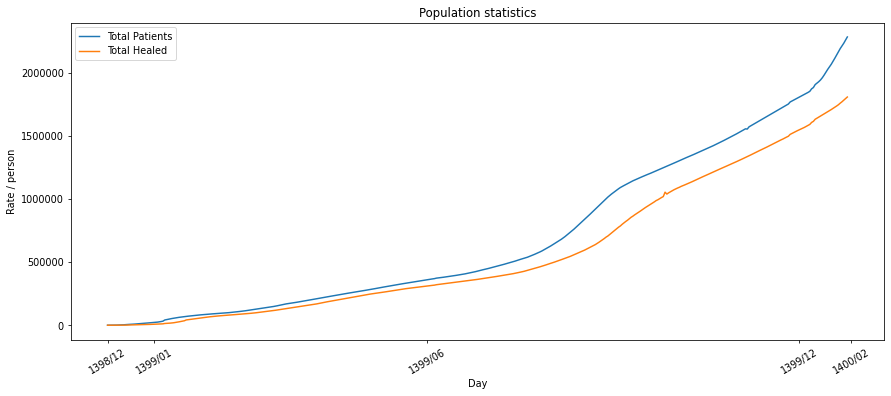

In [472]:
#-- This chart is designed to compare total patient information and improved patients.

plt.figure(figsize=(15, 6), dpi=70)

plt.plot(df['Date'], df['Total_Patients'],label="Total Patients")
plt.plot(df['Date'], df['Total_Healed'],label="Total Healed")

plt.xticks([0, 26, 179, 387, 416],['1398/12','1399/01','1399/06','1399/12', '1400/02'])
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.xlabel("Day")
plt.ylabel("Rate / person")
plt.title("Population statistics")
plt.show()

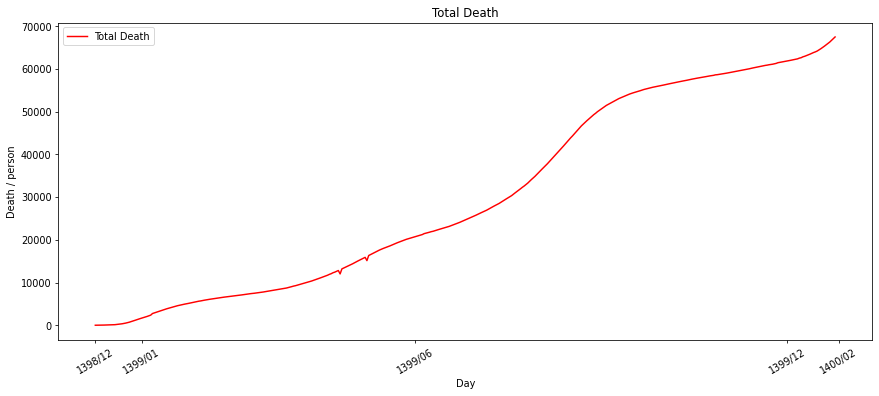

In [19]:
#-- This chart is designed to examine the death rate of patients.

plt.figure(figsize=(15, 6), dpi=70)

plt.plot(df['Date'], df['Total_Death'],label="Total Death", color="Red")

plt.xticks([0, 26, 179, 387, 416],['1398/12','1399/01','1399/06','1399/12', '1400/02'])
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.xlabel("Day")
plt.ylabel("Death / person")
plt.title("Total Death")
plt.show()

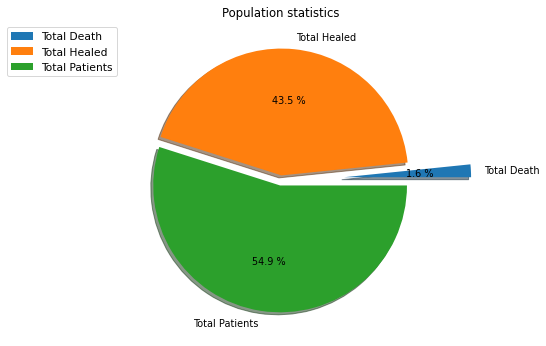

In [20]:
#-- This chart is for displaying and comparing the percentage of each category

plt.figure(figsize=(10, 6), dpi=70)

x = [df['Total_Death'].max(),df['Total_Healed'].max(),df['Total_Patients'].max()]
labels = ["Total Death", "Total Healed", "Total Patients"]

myexplode = [0.5, 0.04, 0.04]
plt.pie(x, labels = labels, explode = myexplode, shadow = True, autopct='%1.1f %%')
plt.legend(labels, loc='best', bbox_to_anchor=(0, 1), fontsize=11)
plt.title("Population statistics")
plt.show() 

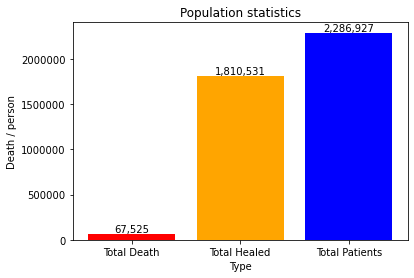

In [24]:
#-- This chart is for displaying and comparing the numerical value of each category

Column = [1,2,3]
height = [df['Total_Death'].max(),df['Total_Healed'].max(),df['Total_Patients'].max()]  
tick_label = ['Total Death', 'Total Healed', 'Total Patients']
  
bars = plt.bar(Column, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange', 'blue'])

plt.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.xlabel("Type")
plt.ylabel("Death / person")
plt.title("Population statistics")
plt.ticklabel_format(style='plain', axis='y')
plt.show()